<a href="https://colab.research.google.com/github/sebastiansossah/regression_problem_deepLearning/blob/main/house_prices_regression_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will predict the median price of homes in given boston suburb in the middle 1970


*   We will use 404 training samples 
*   And 102 test samples



In [1]:
from keras.datasets import boston_housing

In [2]:
(training_data, training_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [3]:
training_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

## preparing the data 

some vales on the data set , has different range of values, some features goes from 0 to 1, others goes from 1 to 12 , and some features goes from 0 to 100.
This makes the learning process more difficult, thats why we want to make the data homogeneous


One of the best practices to deal with this problem is do th feature-wise normalization: for each feature in the input data (a column in the input data matrix), you substract the mean of the feature an divide by the standard deviation, do that the feature is centered around 0 and has a unit standard deaviation

In [5]:
mean = training_data.mean(axis=0)
training_data -= mean
std = training_data.std(axis=0)
training_data /= std 

test_data -= mean 
test_data /= std

The quantities used for normalizing the test data are computed using the training data. You shoul never use in your workflow any quanity computed on the test data, even for something as simple as data normalization 

## Building the network 

In [6]:
from keras import models 
from keras import layers

In [16]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(training_data.shape[1],)))

  model.add(layers.Dense(64, activation='relu'))
  
  #the networks ends with a single layer because it makes the networ to predict any continue value 
  model.add(layers.Dense(1))

  # We use the mean squared error, this is the square of the difference between the predictions and the targets 
  #( this is a widely used loss function for regresssion problems )

  # We monitoring the network with mean absolute error(MAE) this is the absolute value of the difference between the predictions and th targets
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

## Validating the approach

In [8]:
import numpy as np

In [18]:
k = 4
num_val_samples = len(training_data) // k
num_epochs = 100
all_scores = []

In [19]:
for i in range(k):
  print('processing fold # ', i)
  #prepares the validation data: data from partition 
  val_data = training_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = training_targets[i * num_val_samples: (i + 1) * num_val_samples ]

  #prepares the trainig data: data from all other partitions
  partial_train_data = np.concatenate(
      [training_data[:i * num_val_samples],
       training_data[(i+1) * num_val_samples:],],
       axis=0)
  partial_trainig_targets = np.concatenate(
      [training_targets[:i * num_val_samples],
       training_targets[(i+1) * num_val_samples:]],
       axis=0)
  
  #Build the keras model
  model = build_model()
  model.fit(partial_train_data, partial_trainig_targets, epochs=num_epochs, batch_size=1, verbose=0)
  #Evaluate the model on the validation data
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose= 0)
  all_scores.append(val_mae)

processing fold #  0
processing fold #  1
processing fold #  2
processing fold #  3


Results 

In [22]:
print(all_scores)
np.mean(all_scores)

[2.307680606842041, 2.8501245975494385, 2.5169358253479004, 2.409085512161255]


2.5209566354751587

The different validation score goes from 2.30 to 2.40.
The average of the score is 2.5 in this case we are off by 2.500 on average, wich is significant considering that the price range from 10.000 to 50.000

We going to try training the network a bit longer 500 epochs 

In [67]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print('processing fold # ', i)
  val_data = training_data[i * num_val_samples: (i +1 ) * num_val_samples]
  val_targets = training_targets[i * num_val_samples: (i + 1) * num_val_samples ]

  partial_train_data = np.concatenate(
      [training_data[:i * num_val_samples],
       training_data[(i +1 ) * num_val_samples:]],
       axis=0)
  
  partial_trainig_targets = np.concatenate(
      [training_targets[:i * num_val_samples],
       training_targets[(i + 1) * num_val_samples:]],
       axis=0)
  
  model = build_model()
  history = model.fit(partial_train_data, partial_trainig_targets, 
                      epochs=num_epochs, batch_size=1, verbose=0)

  mae_history = history.history['mae']
  all_mae_histories.append(mae_history)

processing fold #  0
processing fold #  1
processing fold #  2
processing fold #  3


In [68]:
print(all_mae_histories)

[[11.69255542755127, 4.054083824157715, 3.3715031147003174, 2.9342477321624756, 2.753098249435425, 2.6576335430145264, 2.4929139614105225, 2.421847105026245, 2.423668622970581, 2.378438949584961, 2.329357624053955, 2.2514615058898926, 2.2831504344940186, 2.184887647628784, 2.151064157485962, 2.214160203933716, 2.1899847984313965, 2.1625380516052246, 2.1036438941955566, 2.061727523803711, 2.017003059387207, 2.060990333557129, 2.003180980682373, 1.9831361770629883, 2.015369176864624, 1.9738080501556396, 1.9414161443710327, 1.9583024978637695, 1.9524991512298584, 1.8880857229232788, 1.9474679231643677, 1.8722522258758545, 1.8974863290786743, 1.9077045917510986, 1.824544906616211, 1.8549913167953491, 1.7897711992263794, 1.8509056568145752, 1.77651846408844, 1.7884674072265625, 1.7716554403305054, 1.764061450958252, 1.7146148681640625, 1.774687647819519, 1.6921824216842651, 1.7016677856445312, 1.6991820335388184, 1.7566090822219849, 1.696379542350769, 1.7044752836227417, 1.672005534172058, 

In [69]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [70]:
np.mean(average_mae_history)

1.0540008324086667

## Plotting validation scores

In [71]:
import matplotlib.pyplot as plt

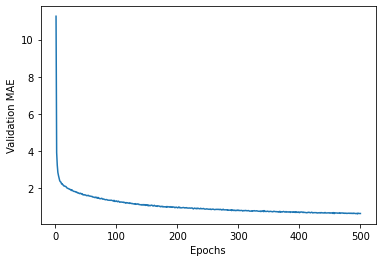

In [72]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Because the scaling issues it is relatively difficult to see the plot, so we going to do the following 


*   Omit the first 10 data points wich are on a different scale than the rest of the curve 
*   Replace each point with an exponential moving average of the previous point, to obtain a smooth curve



In [73]:
def smooth_curve(points, factor= 0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

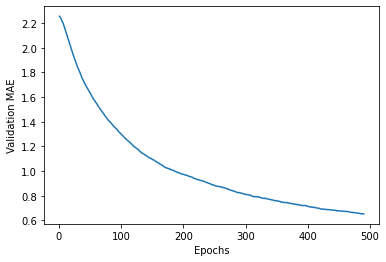

In [74]:
smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history)+ 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

## Training the final model

In [75]:
model = build_model()
model.fit(training_data, training_targets, 
          epochs= 80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 5ms/step - loss: 18.0367 - mae: 2.6863
